## This notebook is an example of how to pipeline two models. 
This notebook is an example how to use DeGirum PySDK to do AI inference of a graphical file using two AI models: face detection and mask detection. The face detection model is run on the image and the results are then processed by the mask detection model, one face bbox at a time.
Combined result is then displayed.
This script uses PIL as image processing backend.

This script works with the following inference options:

1. [DeGirum Cloud Platform](https://cs.degirum.com),
1. DeGirum-hosted AI server node shared via Peer-to-Peer VPN,
1. AI server node hosted by you in your local network,
1. AI server running on your local machine,
1. DeGirum ORCA accelerator directly installed on your local machine.

To try different options, you just need to change the `inference_option` in the code below.

### Specify where do you want to run your inferences and camera index here

In [1]:
inference_option = 1  # <<< change it according to your needs selecting from the list in the header comment

### The rest of the cells below should run without any modifications

In [2]:
import degirum as dg # import DeGirum PySDK
import mytools

In [3]:
# connect to model zoo according to selected inference option
zoo = mytools.connect_model_zoo(inference_option)

Inference option = 'DeGirum Cloud Platform' at dgcps://cs.degirum.com


In [12]:
# load models for DeGirum Orca AI accelerator
# (change model name to "...n2x_cpu_1" to run it on CPU)
face_det_model = zoo.load_model("yolo_v5s_face_det--512x512_quant_n2x_orca_1")
mask_det_model = zoo.load_model("mobilenet_v2_mask_yn_cls--224x224_float_n2x_orca_1")

# adjust some model properties
face_det_model.output_confidence_threshold = 0.7
face_det_model.overlay_font_scale = 1.5
face_det_model.overlay_alpha = 1
mask_det_model.overlay_show_labels = True
mask_det_model.overlay_font_scale = 1.5
mask_det_model.overlay_alpha = 1
mask_det_model.output_top_k = 1

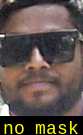

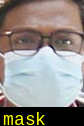

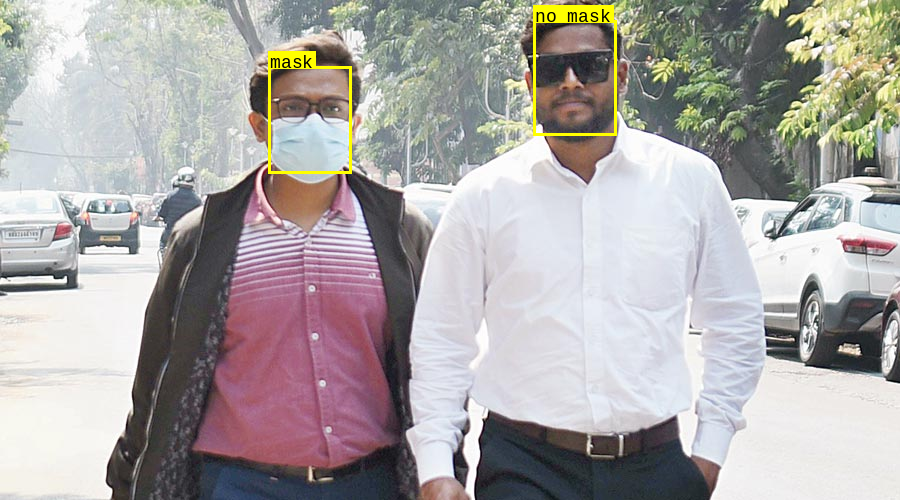

In [14]:
# detect persons
faces = face_det_model('./images/Mask1.jpg')

# for each detected face detect mask
with mask_det_model: # performance optimization to keep connection to mask_det_model open
    for face in faces.results:
        face_box = faces.image.crop(face['bbox'])
        mask = mask_det_model(face_box)
        face["label"] = mask.results[0]["label"]
        display(mask.image_overlay)

# display combined results
display(faces.image_overlay)